In [1]:
# Import pandas, numpy, and matplotlip
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#seaborn is a data visualization library built on matplotlib
import seaborn as sns
#set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm


### Load the data

In [2]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/jngakwa/education/77d9bf5ec227b5c20f95dceed9c41b7f04a0461c/data/EdGap_data.xlsx', 
    dtype={'NCESSCH School ID': object}
)

C:\Users\njeng\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Using the ``na_value=`` to replace instances where day is not applicable, is missing or the data does not meet NCES data quality standards

In [13]:
public = pd.read_csv(
    "https://raw.githubusercontent.com/jngakwa/education/refs/heads/main/data/ELSI_csv_export_6389616524756293429864.csv", na_values=["†", "–", "‡"]
)

In [5]:
school_information = pd.read_csv('https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1', encoding="unicode_escape")


C:\Users\njeng\AppData\Local\Temp\ipykernel_13352\839188818.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1', encoding="unicode_escape")


## Explore the contents of the data sets

#### Start by looking at the ead of each data frame
This will let us see the names of the columns and a few example values for each column. We can also check whether the data is in tidy format.

In [6]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [7]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [8]:
pd.set_option('display.max_columns', None)
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [9]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [19]:
public.head()

,School Name,state,id,fulltime teachers,pupil/teacher ratio
0,1 LT CHARLES W. WHITCOMB SCHOOL,Massachusetts,2502639.0,114.49,11.22
1,100 ACADEMY OF ENGINEERING AND TECHNOLOGY ES,Nevada,3200670.0,18.00,21.28
2,100 ACADEMY OF ENGINEERING AND TECHNOLOGY MS,Nevada,3200756.0,3.00,39.33
3,10TH STREET SCHOOL,Washington,5302475.0,7.30,24.79
4,112 ALC INDEPENDENT STUDY,Minnesota,2704415.0,0.00,NaN


In [20]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SCHOOL_YEAR    102183 non-null  object 
 1   NCESSCH        102181 non-null  float64
 2   LSTATE         102183 non-null  object 
 3   LZIP           102183 non-null  object 
 4   SCH_TYPE_TEXT  102181 non-null  object 
 5   LEVEL          102179 non-null  object 
 6   CHARTER_TEXT   102179 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.5+ MB


### Summary

1. The schoool information data set is much larger than the Edgap data set. Clearly the EdGap data set does not include all schools.
2. There are missing calies in each data set
3. Each data set is in a tidy, or long format
4. The data types for the variables of interest look correct, nut the school identifier is an object in the EdGap data set and a float64 in the school information data set.

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are are not sufficient, we do not want to waste time doing anything that will not be productive.  


Make a pair of plot to explore relationship between the variables period

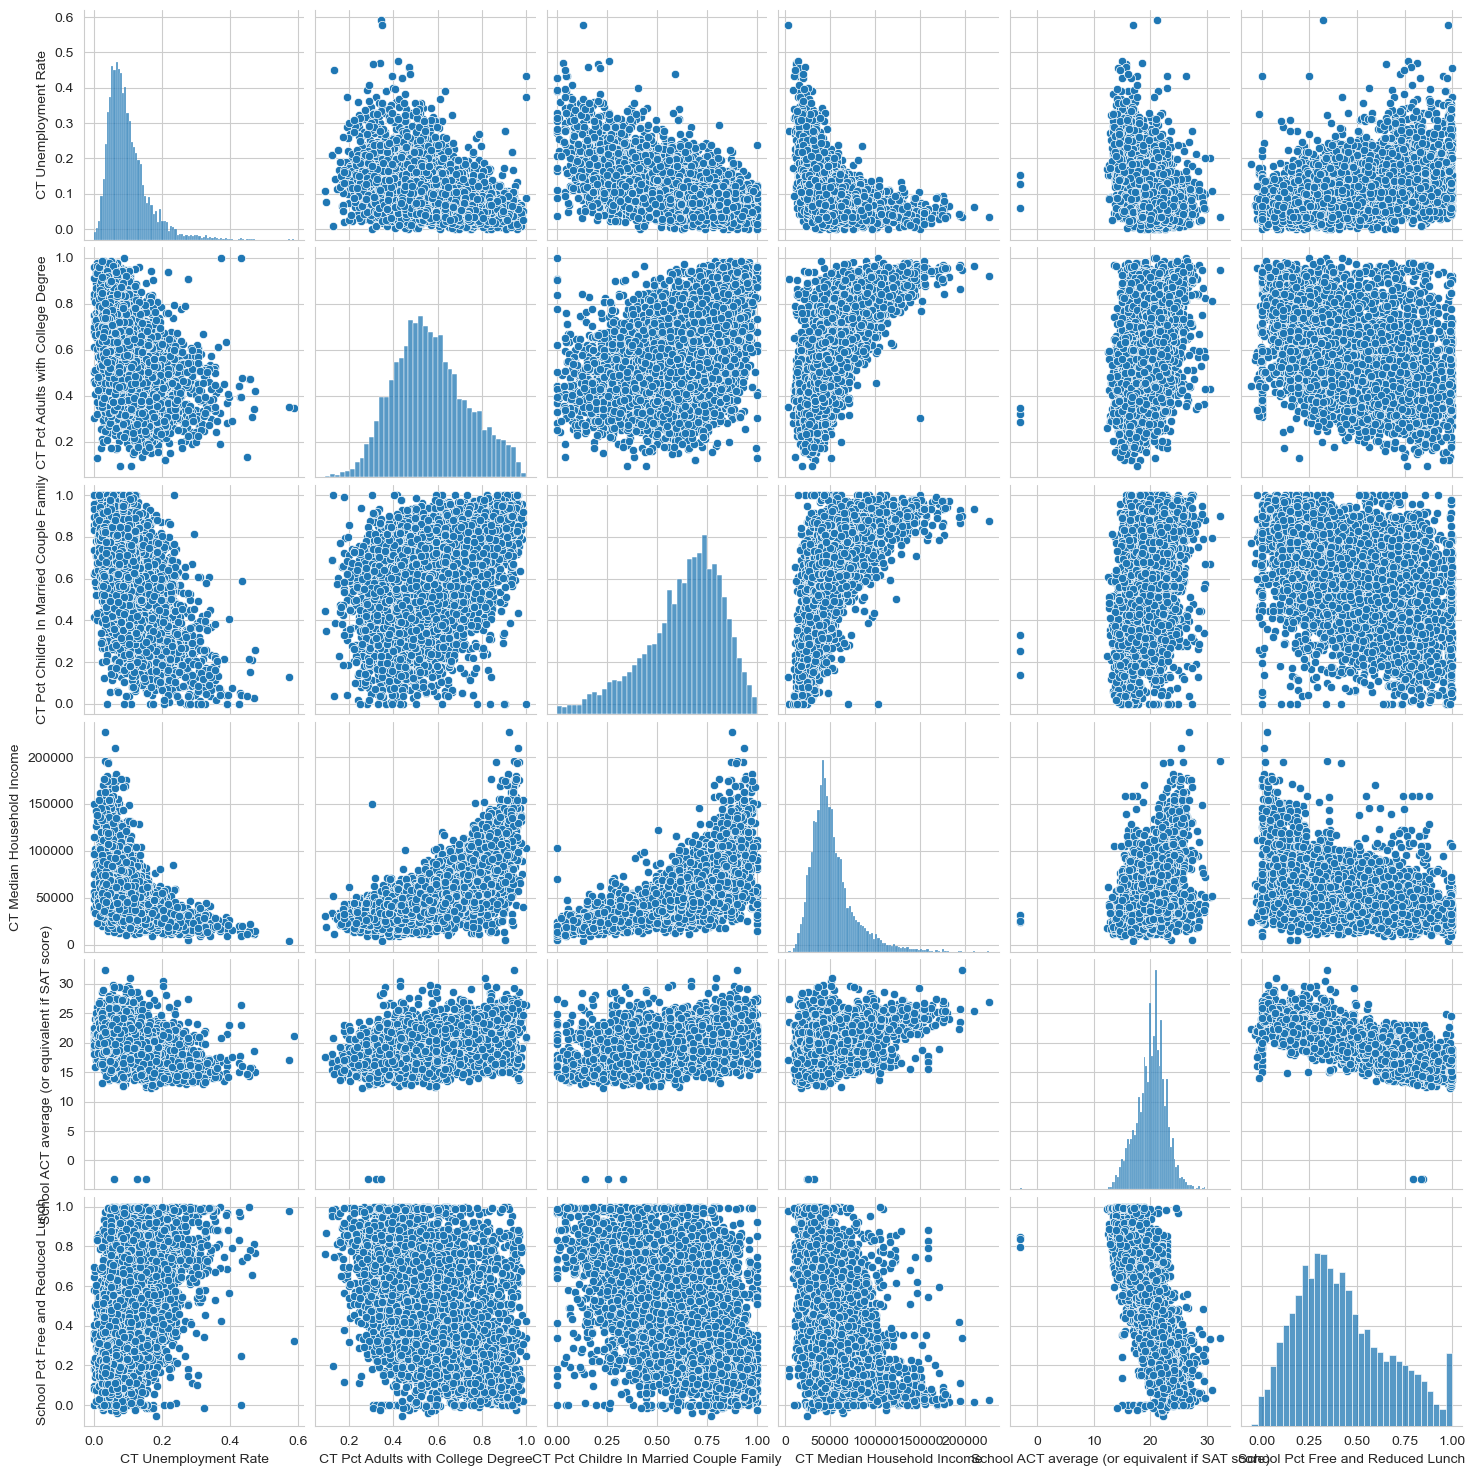

In [21]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

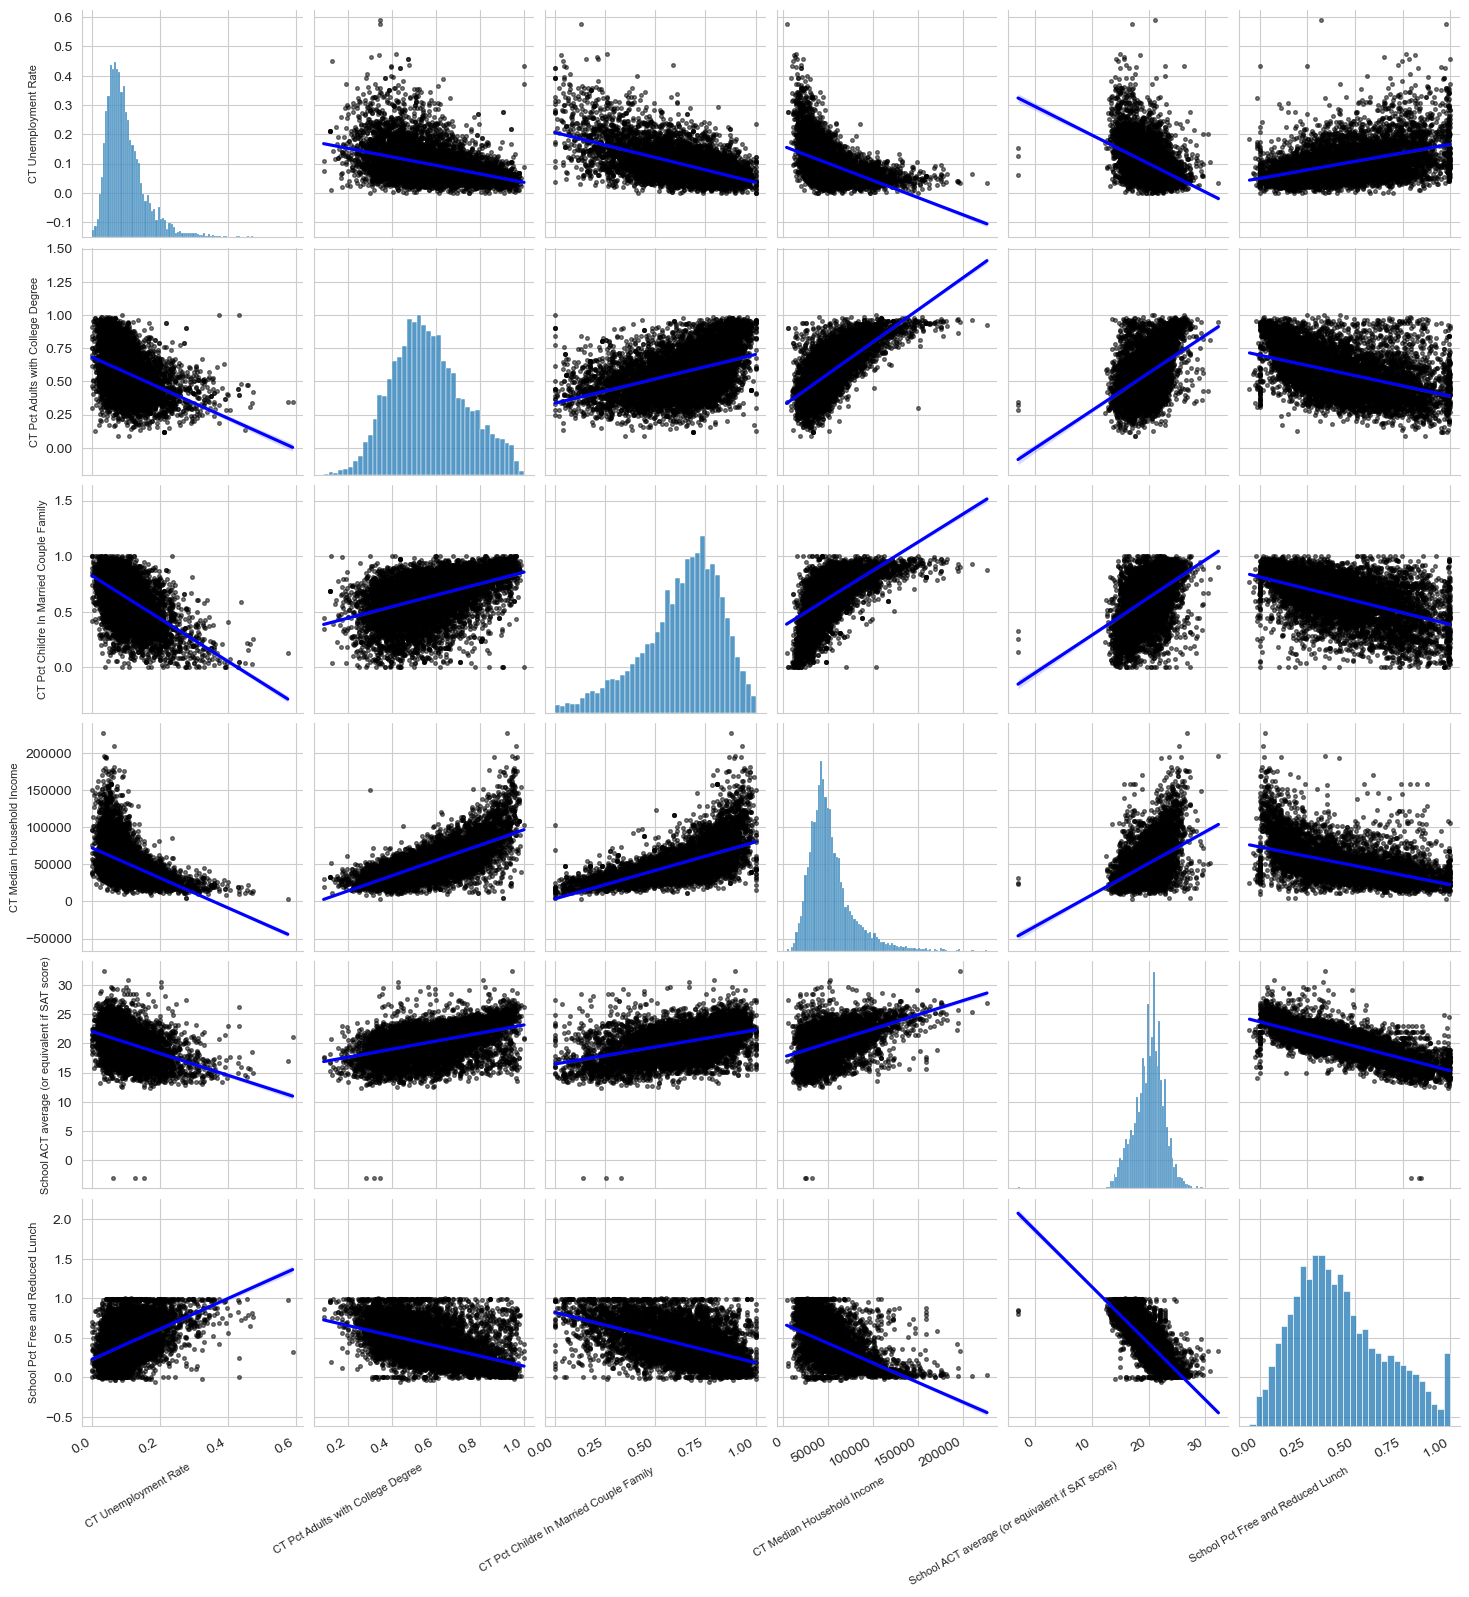

In [22]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s":7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household income':
        ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0)) #Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # Y-axis label size

    # Rotate x-axis tixk labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

plot a single row

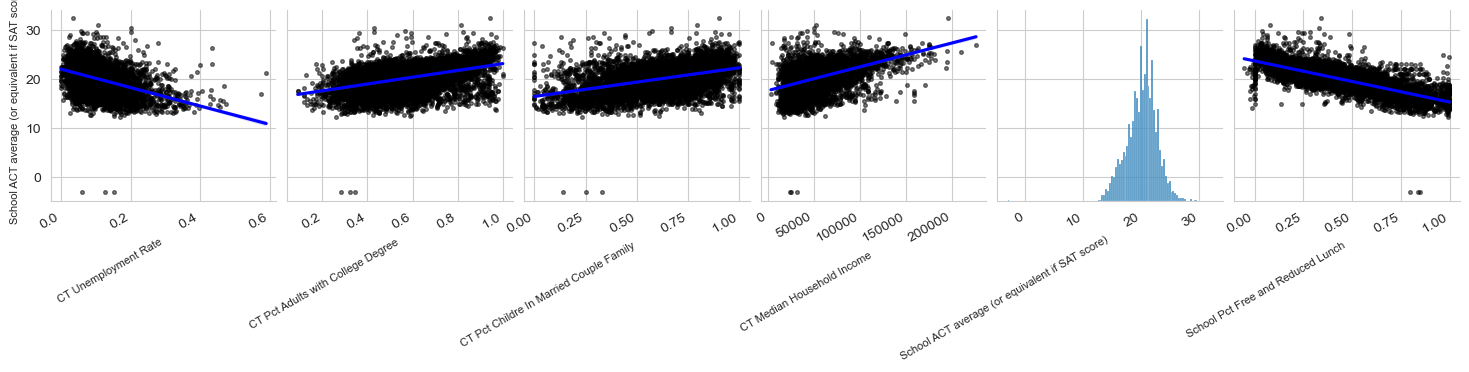

In [23]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s":7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household income':
        ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0)) #Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # Y-axis label size

    # Rotate x-axis tixk labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

### Summary

1.	 There appears to be a relationship between the socioeconomic variables and the ACT score.
2.	There are some out of range ACT and percentage launch values that will need to be dealt with.
3.	We should have confidence that it is worthwhile to find time preparing the data for analysis.


## Data Preparation

### Select relevant subsets of the data

The school information data set contains many columns. We only need the year, school identity, location, and school type information.  
Keep the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT

In [24]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

school_information.head()



,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


### Rename columns

We will rename the columns to follow best practices of style and being informative. We can do this before or after joining the datasets. We will do it before joining the datasets to make it obvious that the key has the same name in each data set (this isn't required, but it makes your work easier to read).

In [25]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [26]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [27]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [28]:
public.columns

Index(['School Name', 'state', 'id', 'fulltime teachers',
       'pupil/teacher ratio'],
      dtype='object')

In [29]:
public = public.rename(
    columns={ 
        'State Name [Public School] Latest available year' : 'state',
       'School ID (7-digit) – NCES Assigned [Public School] 2016-17' : 'id',
       'Full-Time Equivalent (FTE) Teachers [Public School] 2016-17' : 'fulltime teachers',
       'Pupil/Teacher Ratio [Public School] 2016-17' : 'pupil/teacher ratio'
    }
)

### Join data frames

In [30]:
school_information['id'] = school_information['id'].astype('object')

In [31]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [32]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


In [40]:
df = edgap.merge(
    public,
    how='right',
    on='id'
)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99860 entries, 0 to 99859
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   99165 non-null  float64
 1   rate_unemployment    0 non-null      float64
 2   percent_college      0 non-null      float64
 3   percent_married      0 non-null      float64
 4   median_income        0 non-null      float64
 5   average_act          0 non-null      float64
 6   percent_lunch        0 non-null      float64
 7   School Name          99857 non-null  object 
 8   state                99853 non-null  object 
 9   fulltime teachers    95087 non-null  float64
 10  pupil/teacher ratio  93470 non-null  float64
dtypes: float64(9), object(2)
memory usage: 8.4+ MB


### Summary

1. We joined the data sets using the school ``id`` as the key
2. We first cast the ``id`` as an object to have the same data type for the key in each data set.
3. We use a left join to keep all EdGap data.

## Quality Control

There are natural bounds for the numerical variables in the data set. Check the minimim and maximum values in each column.  
We can use the ``describe()`` method to compute descriptive statistics

In [39]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,fulltime teachers,pupil/teacher ratio
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000,0.0,0.0
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651,NaN,NaN
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754,NaN,NaN
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545,NaN,NaN
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501,NaN,NaN
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570,NaN,NaN
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447,NaN,NaN
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729,NaN,NaN


Or use the ``min`` and ``max``

In [21]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


In [22]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan


Check the types, levels, and **_charter_** status of school

In [23]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [24]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

Keep only the high schools since they are the most appropriate to take the ACT test

In [25]:
df = df.loc[df['school_level'] == 'High']

check for any duplicated rows

In [26]:
df.duplicated().sum()

np.int64(0)

### Identify Missing Values

How many values of each variable are missing?

In [27]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


###### What percentage of values of each variable are missing?

In [28]:
percent_mssing = df.isna().mean().round(4) * 100
percent_mssing.to_frame(name='Percent Missing Values')

,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
percent_married,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


What states do we have data from?

In [29]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [30]:
df['state'].nunique()

20

###### Drop the rows where the average ACT score is missing

In [31]:
df = df.dropna(subset=['average_act'])

In [32]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


#### Summary
1. We set out of range values to NaN and will impute them
2. We kept only high schools.
3. We removed schools where we do not have the ACT score.
4. Many schools are missing from the data by omission.
5. We will impute missing calies of socioeconomic variables.
   

## Data Manipulation

Define the predictor variables to be rate_unemployment, percent_collefe, percent_married, median_income, percent_lunch, state, and charter

In [33]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis

In [34]:
imputer = IterativeImputer()

###### Fit the imputer with the numerical predictor variables(this can include dummies for categorical variables)
Define the columns you want to use in imputation process

In [35]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fill the imputer

In [36]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

Impute the missing vvalues in the training data

In [37]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [38]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


#### Export the clean data set

In [39]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)